In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## <center> Data Import

In [2]:
raw_data=pd.read_csv('/Users/pedro/Desktop/technical_challenge_DA/data/measurements.csv')

In [3]:
raw_data

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


In [4]:
raw_data.isna().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [6]:
data=raw_data.copy()

---------

## <center>Data Cleaning

In [7]:
data

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


In [8]:
data[['distance','consume','temp_inside','refill liters']]=data[['distance','consume','temp_inside','refill liters']].applymap(lambda x: float(x.replace(',', '.')) if isinstance(x, str) else x)




In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float64
 1   consume        388 non-null    float64
 2   speed          388 non-null    int64  
 3   temp_inside    376 non-null    float64
 4   temp_outside   388 non-null    int64  
 5   specials       93 non-null     object 
 6   gas_type       388 non-null    object 
 7   AC             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill liters  13 non-null     float64
 11  refill gas     13 non-null     object 
dtypes: float64(4), int64(5), object(3)
memory usage: 36.5+ KB


In [10]:
data.isna().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

In [11]:
data.drop('refill gas',axis=1,inplace=True)

data.dropna(subset='temp_inside',inplace=True)

data['refill liters'].fillna(0,inplace=True)

In [12]:
data['specials'].value_counts()

rain                  31
sun                   26
AC rain                9
ac                     8
AC                     6
snow                   3
sun ac                 3
AC snow                1
half rain half sun     1
AC sun                 1
AC Sun                 1
ac rain                1
Name: specials, dtype: int64

In [13]:
data['specials']=data['specials'].replace({'ac': 'AC',
                                             'sun ac': 'AC sun',
                                             'AC Sun': 'AC sun',
                                             'ac rain': 'AC rain',
                                              'half rain half sun':'rain_sun'})

In [14]:
data[data['specials']=='rain_sun']

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters
191,43.7,4.7,44,22.0,9,rain_sun,SP98,0,1,0,10.0


In [15]:
data.loc[data['specials']=='rain_sun','sun']=1

In [16]:
data.drop('specials',axis=1,inplace=True)

---------

## <center>Data Visualization

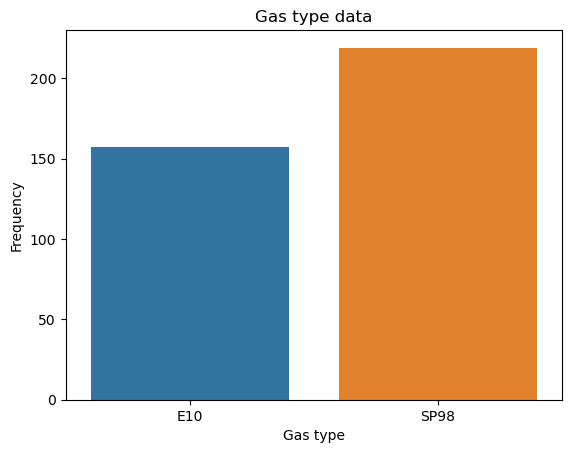

In [17]:
sns.countplot(data=data, x='gas_type')
plt.xlabel('Gas type')
plt.ylabel('Frequency')
plt.title('Gas type data')
plt.show()

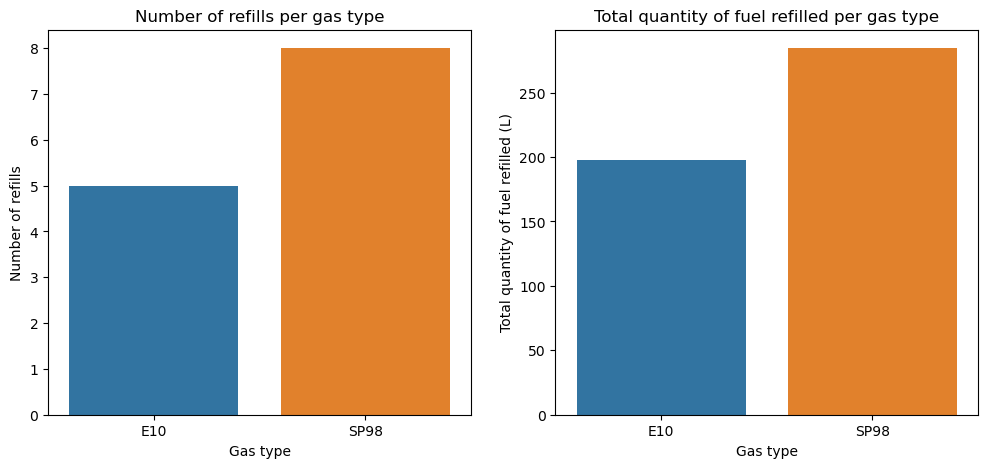

In [18]:
grouped_data=data[data['refill liters'] != 0].groupby('gas_type')['refill liters'].agg(['count', 'sum']).reset_index()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(data=grouped_data, x='gas_type', y='count', ax=ax1)
ax1.set_xlabel('Gas type')
ax1.set_ylabel('Number of refills')
ax1.set_title('Number of refills per gas type')

sns.barplot(data=grouped_data, x='gas_type', y='sum', ax=ax2)
ax2.set_xlabel('Gas type')
ax2.set_ylabel('Total quantity of fuel refilled (L)')
ax2.set_title('Total quantity of fuel refilled per gas type')

plt.show()

In [19]:
e10=data[data['gas_type']=='E10']
sp98=data[data['gas_type']=='SP98']

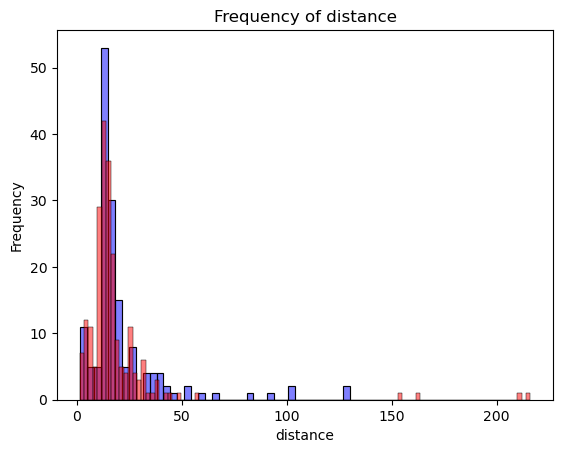

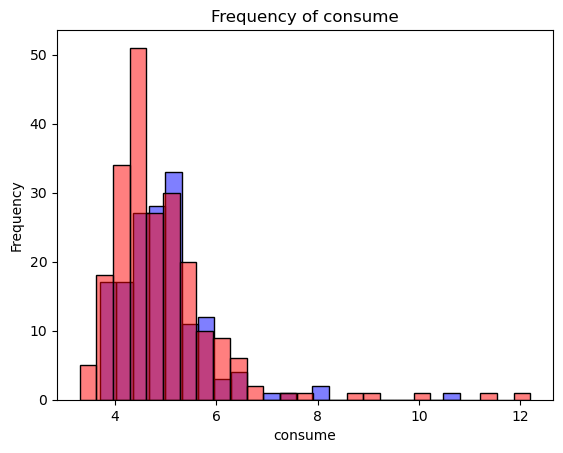

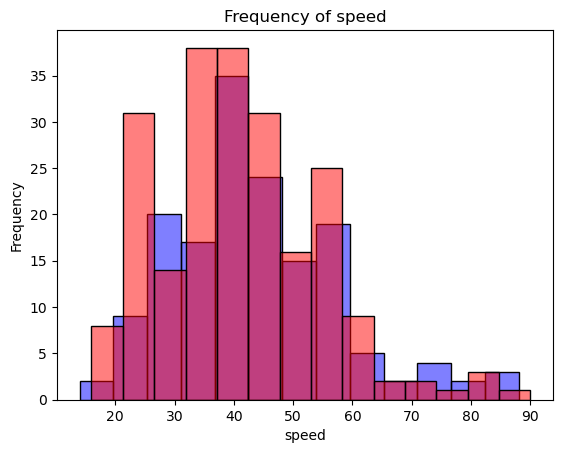

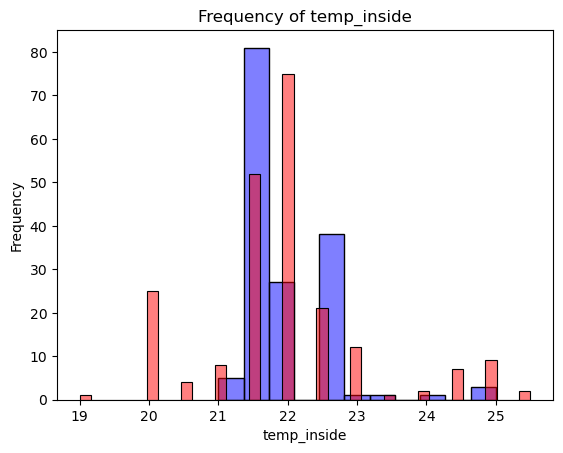

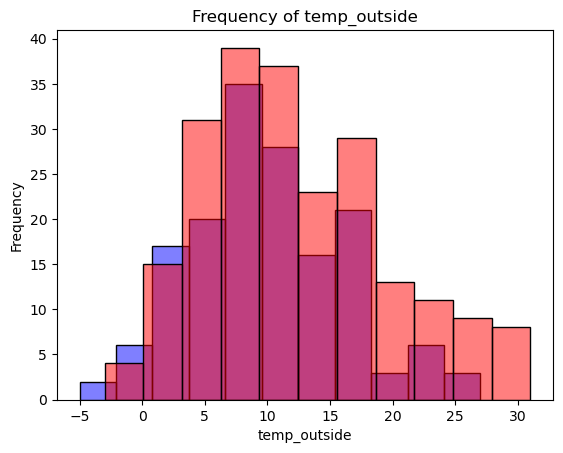

In [20]:
for column in data[['distance','consume','speed','temp_inside','temp_outside']].columns:
    sns.histplot(e10[column],color='blue',alpha=0.5)
    sns.histplot(sp98[column],color='red',alpha=0.5)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Frequency of {column}')
    plt.show()

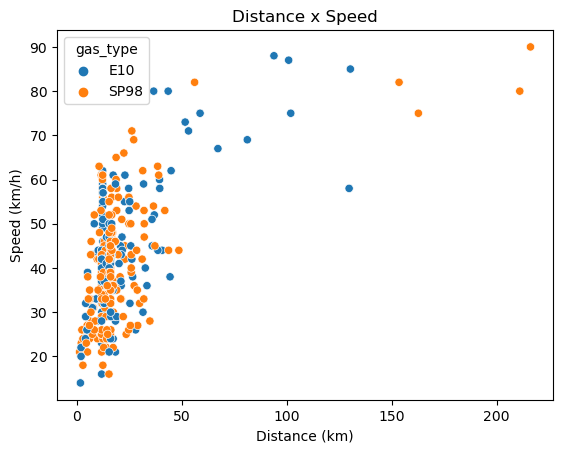

In [21]:
sns.scatterplot(data=data, x='distance', y='speed', hue='gas_type')

plt.xlabel('Distance (km)')
plt.ylabel('Speed (km/h)')
plt.title('Distance x Speed')
plt.show()

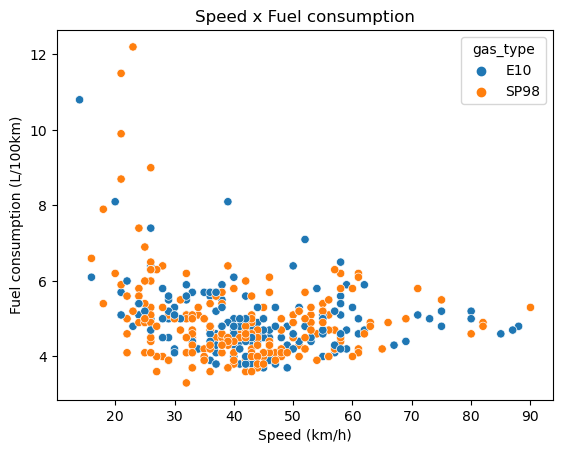

In [22]:
sns.scatterplot(data=data, x='speed', y='consume', hue='gas_type')

plt.xlabel('Speed (km/h)')
plt.ylabel('Fuel consumption (L/100km)')
plt.title('Speed x Fuel consumption')
plt.show()

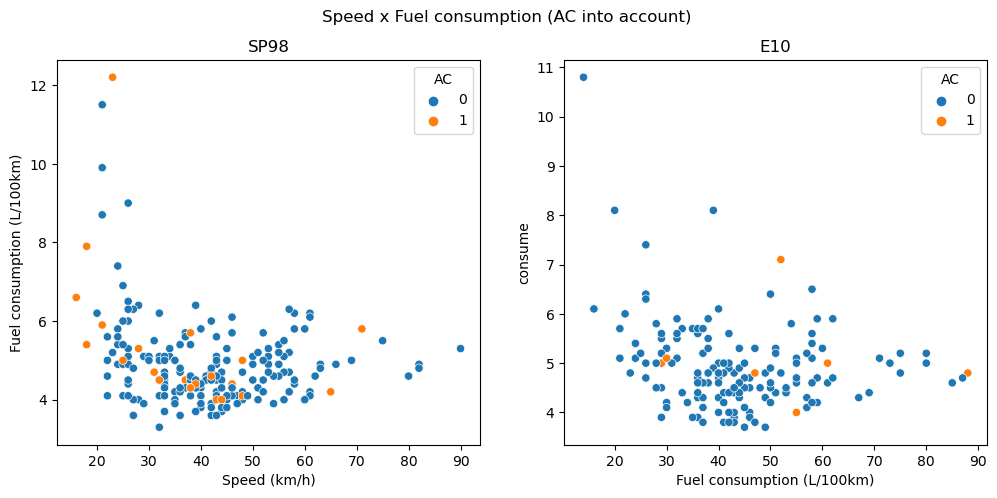

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(data=sp98, x='speed', y='consume', hue='AC', ax=ax1)
ax1.set_xlabel('Speed (km/h)')
ax1.set_ylabel('Fuel consumption (L/100km)')
ax1.set_title('SP98')

sns.scatterplot(data=e10, x='speed', y='consume', hue='AC', ax=ax2)
ax2.set_xlabel('Speed (km/h)')
ax2.set_xlabel('Fuel consumption (L/100km)')
ax2.set_title('E10')

fig.suptitle('Speed x Fuel consumption (AC into account)')
plt.show()

------------

## <center>Inferential Stats

In [24]:
corr,p_value = stats.pearsonr(data['speed'], data['consume'])
print(f'correlation: {round(corr,2)}, p-value: {round(p_value,7)}')

correlation: -0.23, p-value: 4.3e-06


Since the correlation value is positive and the p-value is less than 0.05, we can conclude that **there is a significative linear correlation** between velocity and the fuel consumption. This means that **the faster the vehicle goes, more fuel it consumes.**

In [25]:
ac_on=data[data['AC']==1]['consume']
ac_off=data[data['AC']==0]['consume']

t_stat,p_value=stats.ttest_ind(ac_on,ac_off)
print(f't-statistic: {round(t_stat,2)}, p-value: {round(p_value,3)}')

t-statistic: 1.82, p-value: 0.069


Since the p-value is more than 0.05, **we can not conclude that there is an influence of the AC on the fuel consumption.**

In [26]:
e10 = data[data['gas_type'] == 'E10']['consume']
sp98 = data[data['gas_type'] == 'SP98']['consume']

t_stat, p_value = stats.ttest_ind(e10, sp98)
print(f"T-statistic: {round(t_stat,2)}, p-value: {round(p_value,2)}")

T-statistic: 0.4, p-value: 0.69


Since the p-value is more than 0.05, **we can not conclude that there is a significant difference in fuel consumption between vehicles using E10 and SP98.**

------

## <center>Predicting Velocity based on Fuel Consumption
    
To check if our drivers are driving safe, we can predict the velocity of the vehicle based on the fuel consumption. 

In [27]:
X=data[['consume']]
y=data['speed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

regression_model=LinearRegression()
regression_model.fit(X_train, y_train)

y_pred=regression_model.predict(X_test)